In [11]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
import seaborn as sns


In [4]:
df_statlog=pd.read_csv('capstone datasets/Heart Disease Statlog/Heart_disease_statlog.csv')

| Column       | Description                                                                                                                 | Example (Row 0) |
| ------------ | --------------------------------------------------------------------------------------------------------------------------- | --------------- |
| **age**      | Age of the patient (in years)                                                                                               | 70              |
| **sex**      | Sex of the patient: `1` = male, `0` = female                                                                                | 1               |
| **cp**       | Chest pain type:<br>• `0` = typical angina<br>• `1` = atypical angina<br>• `2` = non-anginal pain<br>• `3` = asymptomatic   | 3               |
| **trestbps** | Resting blood pressure (in mm Hg)                                                                                           | 130             |
| **chol**     | Serum cholesterol (in mg/dL)                                                                                                | 322             |
| **fbs**      | Fasting blood sugar > 120 mg/dL: `1` = true, `0` = false                                                                    | 0               |
| **restecg**  | Resting electrocardiographic results:<br>• `0` = normal<br>• `1` = ST-T abnormality<br>• `2` = left ventricular hypertrophy | 2               |
| **thalach**  | Maximum heart rate achieved                                                                                                 | 109             |
| **exang**    | Exercise-induced angina: `1` = yes, `0` = no                                                                                | 0               |
| **oldpeak**  | ST depression induced by exercise relative to rest                                                                          | 2.4             |
| **slope**    | Slope of the peak exercise ST segment:<br>• `0` = upsloping<br>• `1` = flat<br>• `2` = downsloping                          | 1               |
| **ca**       | Number of major vessels (0–3) colored by fluoroscopy                                                                        | 3               |
| **thal**     | Thalassemia:<br>• `1` = normal<br>• `2` = fixed defect<br>• `3` = reversible defect                                         | 1               |
| **target**   | Diagnosis of heart disease:<br>• `1` = has heart disease<br>• `0` = no heart disease                                        | 1               |


In [5]:
df_statlog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   sex       270 non-null    int64  
 2   cp        270 non-null    int64  
 3   trestbps  270 non-null    int64  
 4   chol      270 non-null    int64  
 5   fbs       270 non-null    int64  
 6   restecg   270 non-null    int64  
 7   thalach   270 non-null    int64  
 8   exang     270 non-null    int64  
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    int64  
 11  ca        270 non-null    int64  
 12  thal      270 non-null    int64  
 13  target    270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


In [6]:
df_statlog.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,2.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,0.585185,0.670370,1.822222,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,0.959140,0.497827
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,1.000000,2.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,2.000000,3.000000,3.000000,1.000000


In [7]:
df_statlog.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,3,130,322,0,2,109,0,2.4,1,3,1,1
1,67,0,2,115,564,0,2,160,0,1.6,1,0,3,0
2,57,1,1,124,261,0,0,141,0,0.3,0,0,3,1
3,64,1,3,128,263,0,0,105,1,0.2,1,1,3,0
4,74,0,1,120,269,0,2,121,1,0.2,0,1,1,0


In [15]:
cat = []
num = []

for col in df_statlog.columns:
    if df_statlog[col].dtypes == 'object':
        cat.append(col)
    elif df_statlog[col].dtypes in ['int64', 'float64']:
        num.append(col)

print(cat)
print(num)

[]
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [16]:
# distribution for num features
def numFeatDistribution(df, num_cols):

    if len(num_cols) == 0:
        return
    
    for col in num_cols:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[col], kde=True, bins=20)
        plt.title(f"{col} Distribution")
        plt.xlabel(f"{col}")
        plt.ylabel("Frequency")
        plt.show()

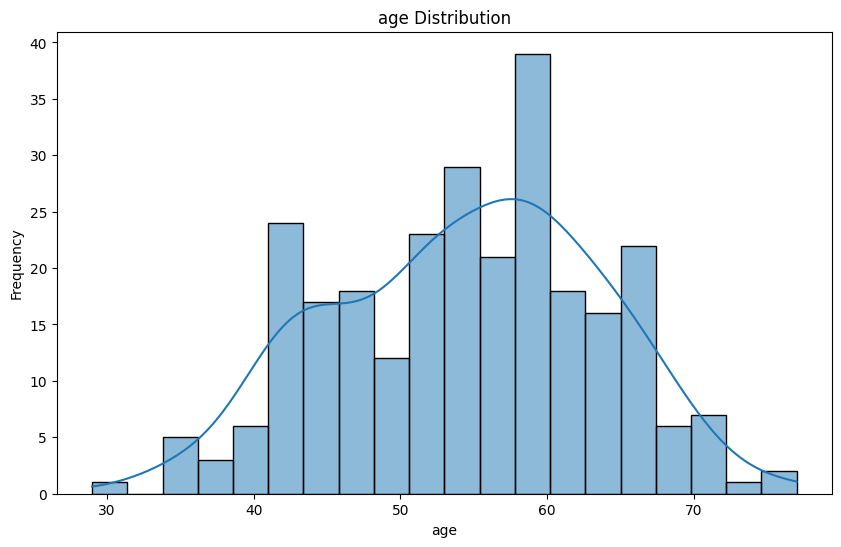

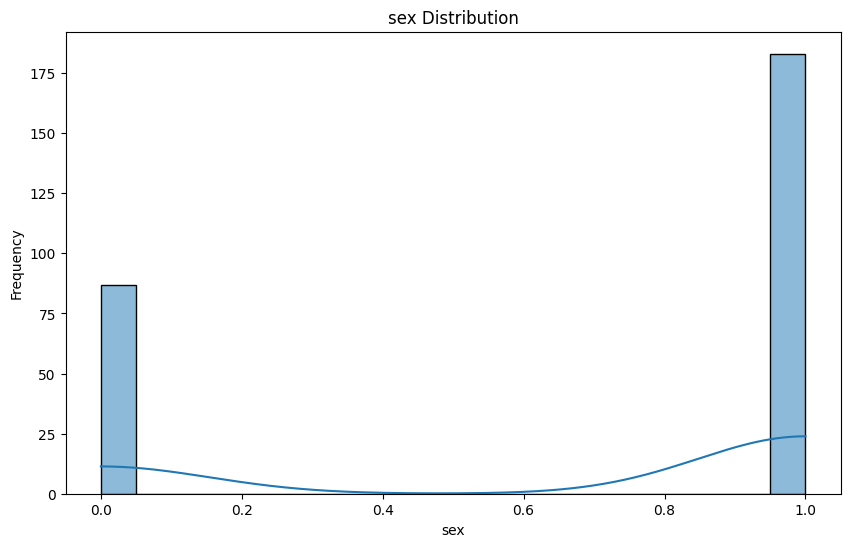

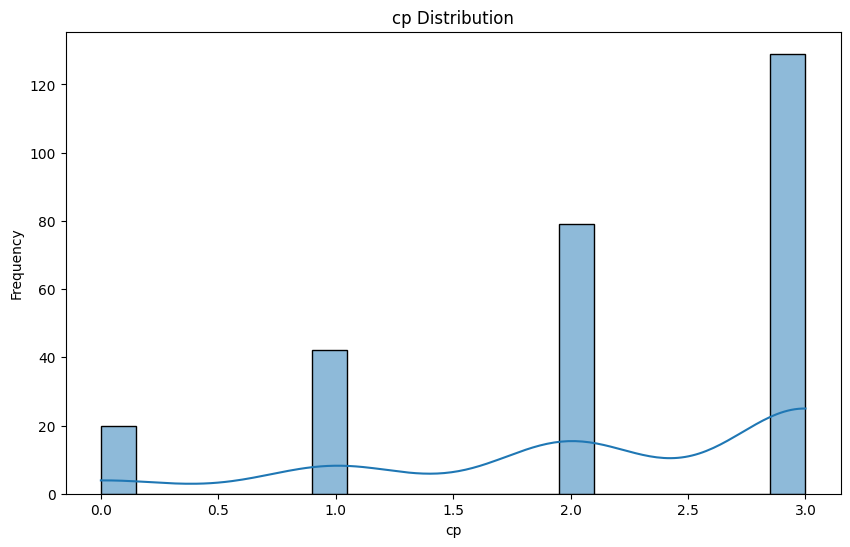

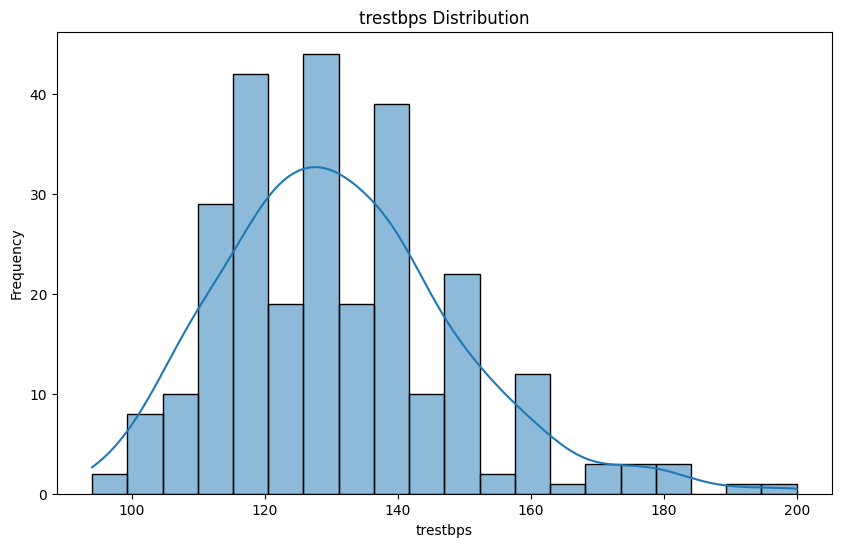

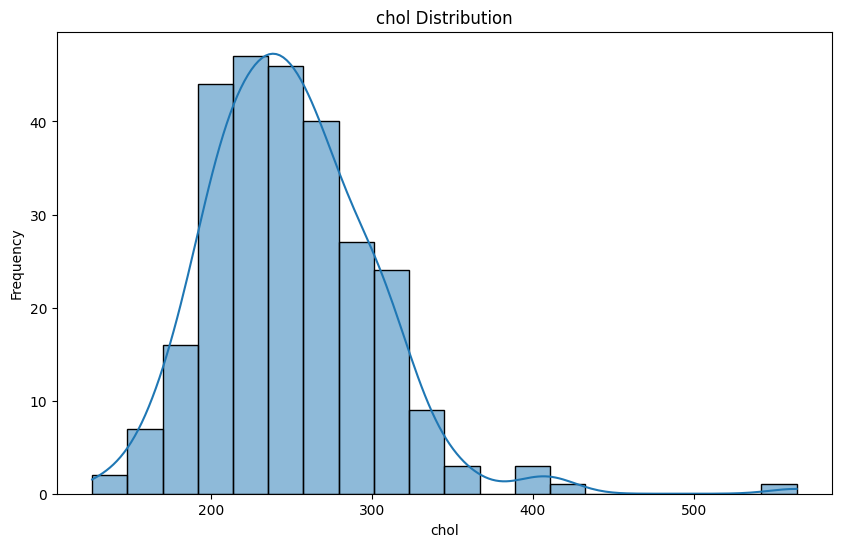

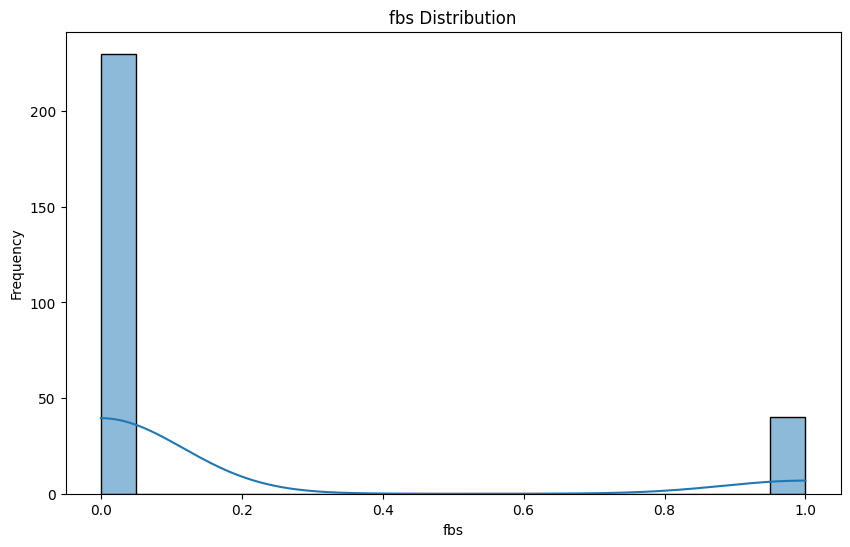

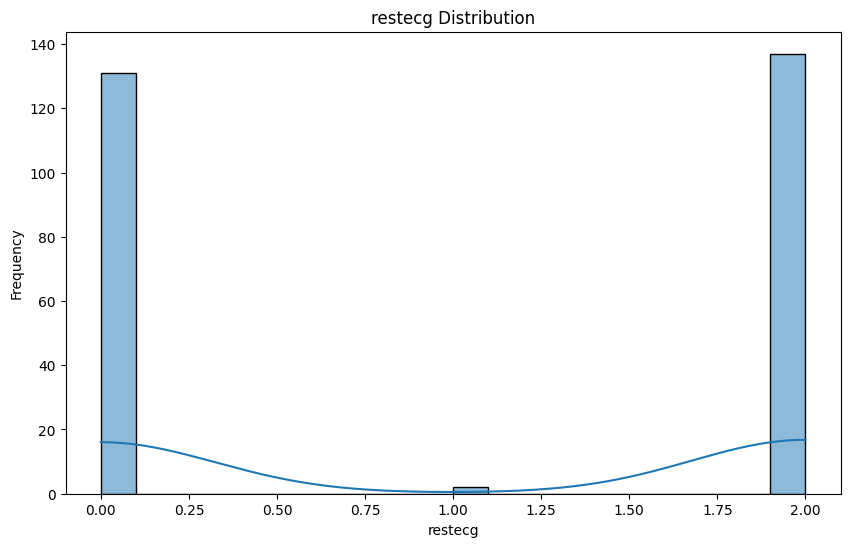

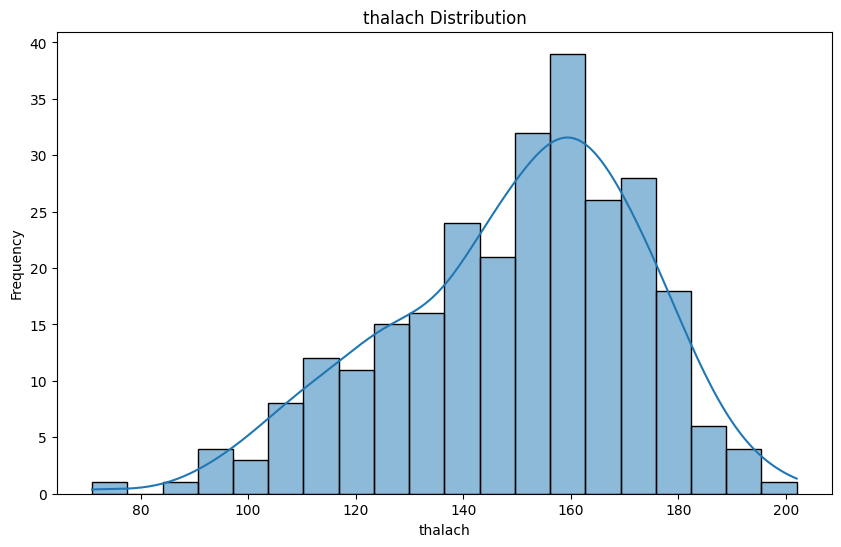

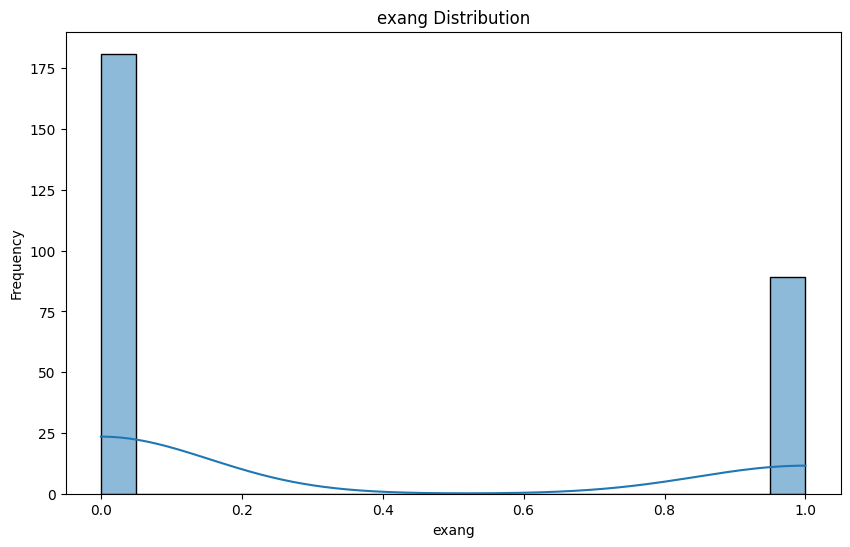

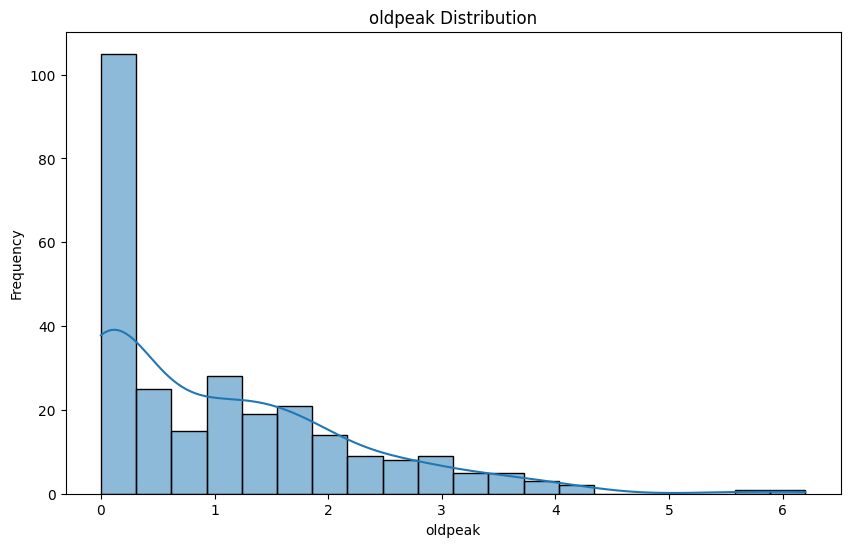

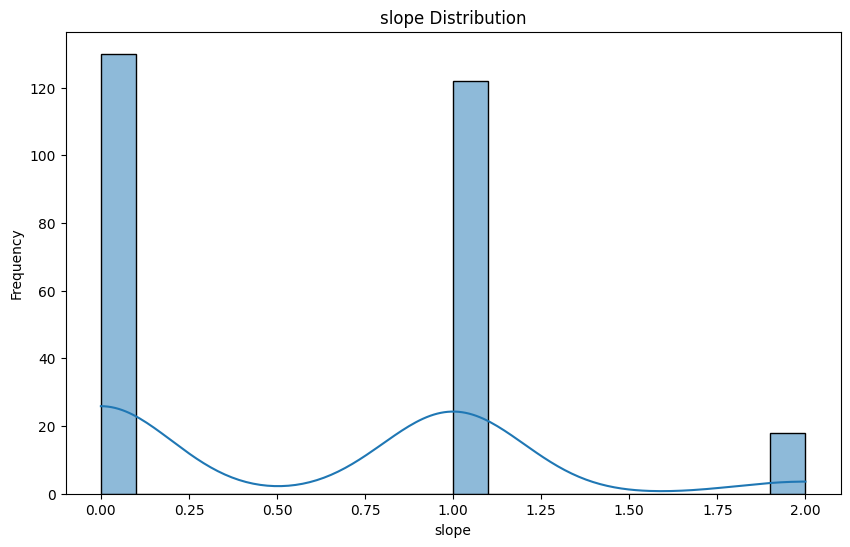

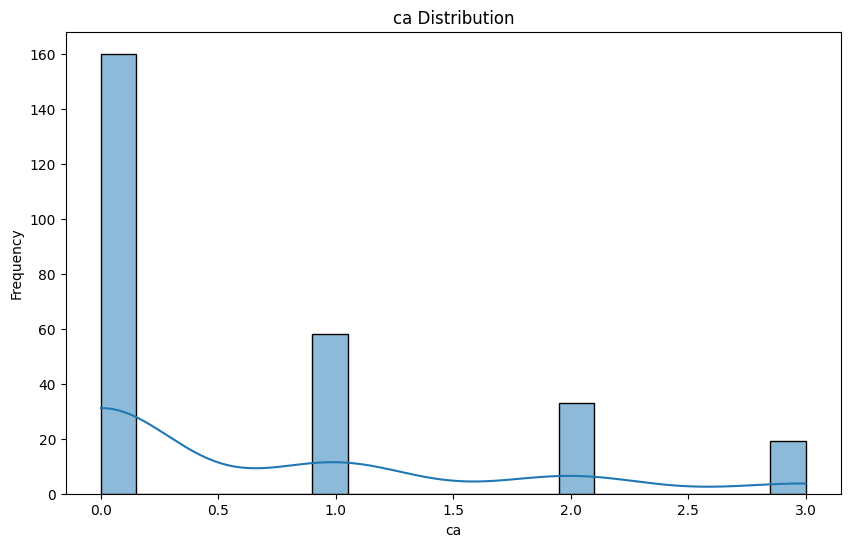

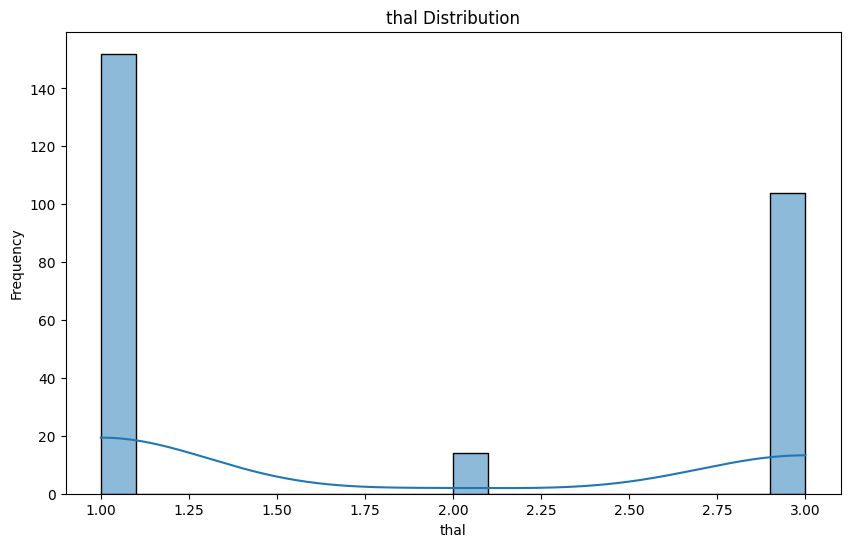

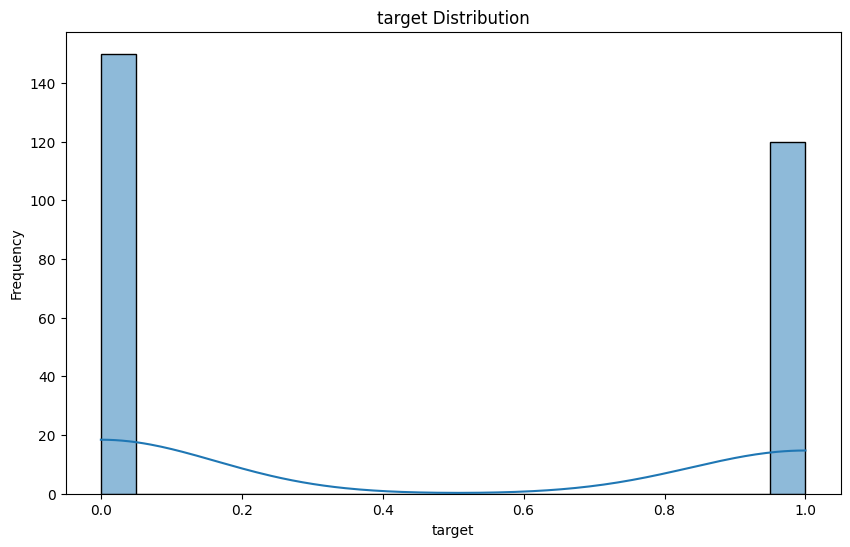

In [17]:
numFeatDistribution(df_statlog, num)

In [ ]:
X=df_statlog.drop(labels='target',axis=1)
y=df_statlog['target']

X_const = sm.add_constant(X)

model = sm.OLS(y, X_const)
results = model.fit()

# Step 4: View summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     23.72
Date:                Sat, 21 Jun 2025   Prob (F-statistic):           6.48e-37
Time:                        12:52:21   Log-Likelihood:                -87.553
No. Observations:                 270   AIC:                             203.1
Df Residuals:                     256   BIC:                             253.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2241      0.309     -0.726      0.4

#### Adding polynomial terms to the above feature dataset

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# Step 1: Create polynomial features (e.g., degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Step 2: Add constant term for intercept
X_poly_const = sm.add_constant(X_poly)

# Step 3: Fit the OLS model
model = sm.OLS(y, X_poly_const)
results = model.fit()

# Step 4: View summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     4.128
Date:                Sat, 21 Jun 2025   Prob (F-statistic):           2.56e-16
Time:                        12:52:21   Log-Likelihood:                -25.868
No. Observations:                 270   AIC:                             255.7
Df Residuals:                     168   BIC:                             622.8
Df Model:                         101                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7518      4.182      1.375      0.1

#### Now let's increase the polynomial terms to 3rd degree and see if R squared is getting improved

In [ ]:
# Step 1: Create polynomial features (e.g., degree=3)
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)

# Step 2: Add constant term for intercept
X_poly_const = sm.add_constant(X_poly)

# Step 3: Fit the OLS model
model = sm.OLS(y, X_poly_const)
results = model.fit()

# Step 4: View summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 21 Jun 2025   Prob (F-statistic):                nan
Time:                        12:52:21   Log-Likelihood:                 5999.9
No. Observations:                 270   AIC:                        -1.146e+04
Df Residuals:                       0   BIC:                        -1.049e+04
Df Model:                         269                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001        inf         -0        n

c:\Users\dganguli\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\regression\linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\Users\dganguli\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\regression\linear_model.py:1795: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\Users\dganguli\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


#### It clearly shows the sign of overfitting.

Now, using LinearRegresson of sklearn and using a for loop to add polynomial features and run 

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

degrees = [1, 2, 3, 4, 5]
cv_scores = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    scores = cross_val_score(model, X_poly, y, cv=5, scoring='r2')
    cv_scores.append(scores.mean())

for d, score in zip(degrees, cv_scores):
    print(f"Degree {d}: Mean CV R^2 = {score:.4f}")

best_degree = degrees[np.argmax(cv_scores)]
print(f"\nBest polynomial degree based on cross-validation: {best_degree}")

Degree 1: Mean CV R^2 = 0.4779
Degree 2: Mean CV R^2 = -0.2294
Degree 3: Mean CV R^2 = -16.3165
Degree 4: Mean CV R^2 = -100.1964
Degree 5: Mean CV R^2 = -116.1103

Best polynomial degree based on cross-validation: 1


In [ ]:
from sklearn.model_selection import KFold

# Cross-validation for OLS with polynomial features

degrees = [1, 2, 3, 4, 5]
cv_scores_ols = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for degree in degrees:
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X)
    fold_scores = []
    for train_idx, test_idx in kf.split(X_poly):
        X_train, X_test = X_poly[train_idx], X_poly[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        X_train_const = sm.add_constant(X_train)
        X_test_const = sm.add_constant(X_test)
        model = sm.OLS(y_train, X_train_const).fit()
        y_pred = model.predict(X_test_const)
        ss_res = np.sum((y_test - y_pred) ** 2)
        ss_tot = np.sum((y_test - np.mean(y_test)) ** 2)
        r2 = 1 - ss_res / ss_tot
        fold_scores.append(r2)
    cv_scores_ols.append(np.mean(fold_scores))

for d, score in zip(degrees, cv_scores_ols):
    print(f"Degree {d}: Mean CV R^2 (OLS) = {score:.4f}")

best_degree_ols = degrees[np.argmax(cv_scores_ols)]
print(f"\nBest polynomial degree for OLS based on cross-validation: {best_degree_ols}")

Degree 1: Mean CV R^2 (OLS) = 0.4606
Degree 2: Mean CV R^2 (OLS) = -0.1852
Degree 3: Mean CV R^2 (OLS) = -14.6440
Degree 4: Mean CV R^2 (OLS) = -36.5466
Degree 5: Mean CV R^2 (OLS) = -604.7670

Best polynomial degree for OLS based on cross-validation: 1


#### Adding interaction term also improved the model R2 

In [ ]:
# Cross-validation for OLS with interaction-only polynomial features

cv_scores_inter = []

for degree in degrees:
    poly_inter = PolynomialFeatures(degree=degree, include_bias=False, interaction_only=True)
    X_inter = poly_inter.fit_transform(X)
    fold_scores = []
    for train_idx, test_idx in kf.split(X_inter):
        X_train, X_test = X_inter[train_idx], X_inter[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        X_train_const = sm.add_constant(X_train)
        X_test_const = sm.add_constant(X_test)
        model = sm.OLS(y_train, X_train_const).fit()
        y_pred = model.predict(X_test_const)
        ss_res = np.sum((y_test - y_pred) ** 2)
        ss_tot = np.sum((y_test - np.mean(y_test)) ** 2)
        r2 = 1 - ss_res / ss_tot
        fold_scores.append(r2)
    cv_scores_inter.append(np.mean(fold_scores))

for d, score in zip(degrees, cv_scores_inter):
    print(f"Degree {d}: Mean CV R^2 (Interaction Only) = {score:.4f}")

best_degree_inter = degrees[np.argmax(cv_scores_inter)]
print(f"\nBest polynomial degree for interaction terms based on cross-validation: {best_degree_inter}")

Degree 1: Mean CV R^2 (Interaction Only) = 0.4606
Degree 2: Mean CV R^2 (Interaction Only) = -0.0959
Degree 3: Mean CV R^2 (Interaction Only) = -41.5436
Degree 4: Mean CV R^2 (Interaction Only) = -27.9499
Degree 5: Mean CV R^2 (Interaction Only) = -772.3010

Best polynomial degree for interaction terms based on cross-validation: 1


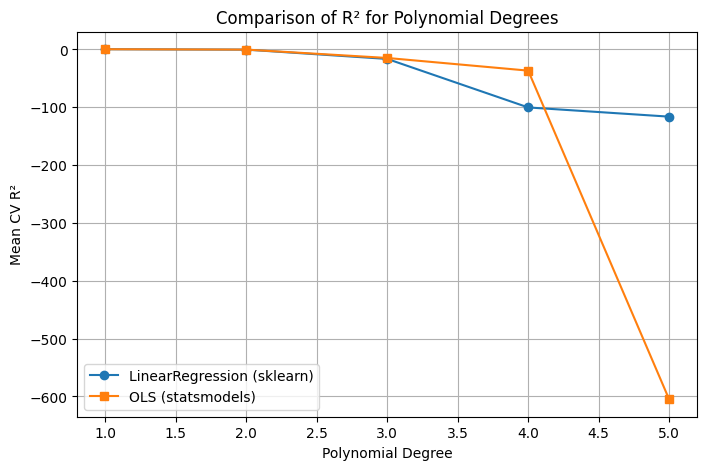

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(degrees, cv_scores, marker='o', label='LinearRegression (sklearn)')
plt.plot(degrees, cv_scores_ols, marker='s', label='OLS (statsmodels)')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean CV R²')
plt.title('Comparison of R² for Polynomial Degrees')
plt.legend()
plt.grid(True)
plt.show()